Meta data sheet


Variable	Definition	Key

1.survival	=Survival	0 = No, 1 = Yes

2.pclass	=Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

3.sex	=Sex

4.Age	=Age in years	

5.sibsp	= of siblings / spouses aboard the Titanic

6.parch	= of parents / children aboard the Titanic

7.ticket=	Ticket number	

8.fare	=Passenger fare

9.cabin	=Cabin number

10.embarked=	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton




Variable Notes:


pclass: A proxy for socio-economic status (SES)


1st = Upper

2nd = Middle

3rd = Lower


age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5



sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)


parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import csv

In [5]:
import numpy as np

let's start with our data  

In [6]:
x=pd.read_csv("train.csv")

In [7]:
y=pd.read_csv("test.csv")

In [8]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
y.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
x.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
y.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
x.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
y.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

let's fill null values 

In [16]:
x.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
x["Age"].isnull().sum()

177

In [18]:
x["Age"]=x["Age"].fillna(29)

In [19]:
x["Age"].isnull().sum()

0

In [20]:
y["Age"].isnull().sum()

86

In [21]:
y["Age"]=y["Age"].fillna(30)

In [22]:
y["Age"].isnull().sum()

0

In [23]:
y["Fare"].isnull().sum()

1

In [24]:
y["Fare"]=y["Fare"].fillna(35)

In [25]:
y["Fare"].isnull().sum()

0

let's plot and drope those columns whish are not imp 

In [26]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


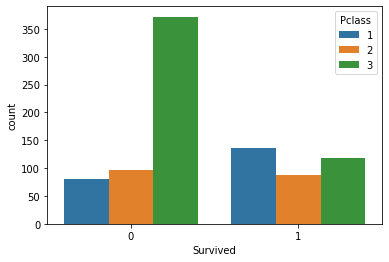

In [27]:
sns.countplot(x="Survived",hue="Pclass",data=x)

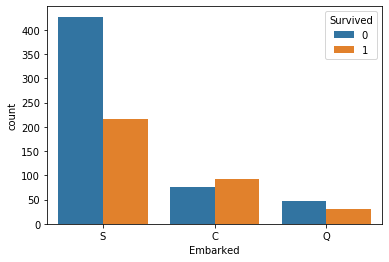

In [28]:
sns.countplot(x.Embarked,hue="Survived",data=x)

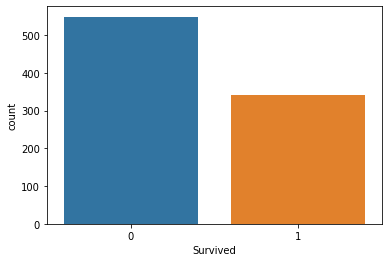

In [29]:
sns.countplot(x.Survived,data=x)

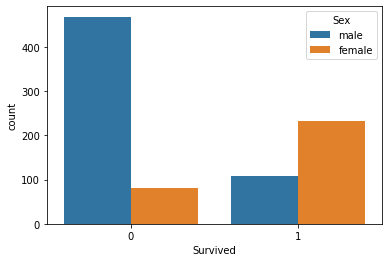

In [30]:
sns.countplot(x="Survived",hue="Sex",data=x)

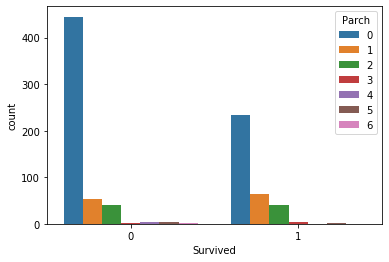

In [31]:
sns.countplot(x.Survived,hue="Parch",data=x)

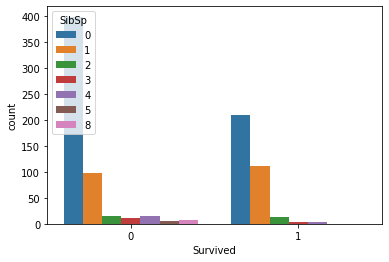

In [32]:
sns.countplot(x.Survived,hue="SibSp",data=x)

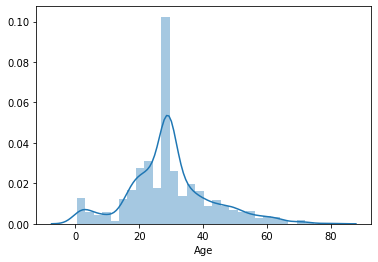

In [33]:
sns.distplot(x["Age"])

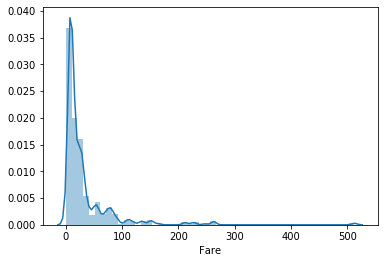

In [34]:
sns.distplot(x["Fare"])

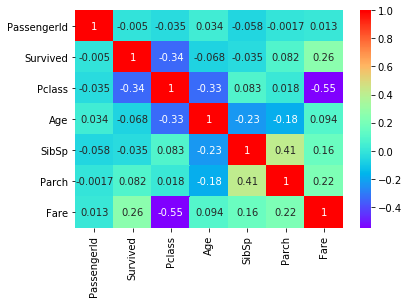

In [35]:
sns.heatmap(x.corr(),cmap="rainbow",annot=True)

let's drope some columns now

In [36]:
x.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
x.drop(columns=['PassengerId',  'Name',
       'Parch', 'Ticket',  'Cabin',"Embarked" ],inplace=True)

In [38]:
y.drop(columns=['PassengerId',  'Name',
       'Parch', 'Ticket',  'Cabin',"Embarked" ],inplace=True)

In [39]:
x["Sex"]=pd.get_dummies(x["Sex"])

In [40]:
y["Sex"]=pd.get_dummies(y["Sex"])

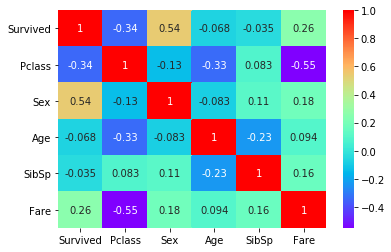

In [41]:
sns.heatmap(x.corr(),cmap="rainbow",annot=True)

Data is ready for giving in ml model 

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
target=x.Survived

In [44]:
x.drop(columns=("Survived"),inplace=True)

In [45]:
x_train,x_test,target_train,target_test=train_test_split(x,target,random_state=0,test_size=0.30)

In [46]:
#from sklearn.preprocessing import StandardScaler

In [47]:
#from sklearn.decomposition import PCA

In [48]:
#std_scl=StandardScaler()

In [49]:
x1=x.copy()

In [50]:
y1=y.copy()

In [51]:

#x=std_scl.fit_transform(x)

In [52]:
#y=std_scl.fit_transform(y)

In [53]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [54]:
lr=LogisticRegression()
lrcv=LogisticRegressionCV()
rcm=RandomForestClassifier()

svc=SVC()
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
lr.fit(x_train,target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
result1=lr.predict(x_test)

In [58]:
r1=accuracy_score(result1,target_test)

In [59]:
lrcv.fit(x_train,target_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [60]:
result2=lrcv.predict(x_test)

In [61]:
r2=accuracy_score(result2,target_test)

In [62]:
rcm.fit(x_train,target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
result3=rcm.predict(x_test)

In [64]:
r3=accuracy_score(result3,target_test)

In [65]:
svc.fit(x_train,target_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
result4=svc.predict(x_test)

In [67]:
r4=accuracy_score(result4,target_test)

In [68]:
knc.fit(x_train,target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
result5=knc.predict(x_test)

In [70]:
r5=accuracy_score(result5,target_test)

In [71]:
dtc.fit(x_train,target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
result6=dtc.predict(x_test)

In [73]:
r6=accuracy_score(result6,target_test)

In [74]:
gnb.fit(x_train,target_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [75]:
result7=gnb.predict(x_test)

In [76]:
r7=accuracy_score(result7,target_test)

In [77]:
print("LogisticRegression" ,r1  ,","
      "LogisticRegressionCV",r2  ,","
      "RandomForestClassifier" ,r3,","
      "SVC" ,r4 ,","
      "KNeighborsClassifier"  ,r5, ","
      "DecisionTreeClassifier" ,r6,","
      "GaussianNB" ,r7 ,","
     )

LogisticRegression 0.7985074626865671 ,LogisticRegressionCV 0.7985074626865671 ,RandomForestClassifier 0.8246268656716418 ,SVC 0.7164179104477612 ,KNeighborsClassifier 0.7201492537313433 ,DecisionTreeClassifier 0.8134328358208955 ,GaussianNB 0.7798507462686567 ,


In [78]:
result=rcm.predict(y)

In [79]:
my_life=rcm.predict([[3,1,20,0,7.00]])

In [80]:
my_life

array([1], dtype=int64)

In [81]:
y

,Pclass,Sex,Age,SibSp,Fare
0,3,0,34.5,0,7.8292
1,3,1,47.0,1,7.0000
2,2,0,62.0,0,9.6875
3,3,0,27.0,0,8.6625
4,3,1,22.0,1,12.2875
...,...,...,...,...,...
413,3,0,30.0,0,8.0500
414,1,1,39.0,0,108.9000
415,3,0,38.5,0,7.2500
416,3,0,30.0,0,8.0500


In [82]:
result

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [83]:
z=pd.read_csv("gender_submission.csv")

In [84]:
z.shape

(418, 2)

In [85]:
z

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [86]:
target2=z.Survived

In [87]:
accuracy_score(result,target2)

0.8253588516746412

In [88]:
type(result)

numpy.ndarray

In [89]:
a=np.array(range(418))

In [90]:
b={"PassengerId":z.PassengerId,"Survived":result}

In [91]:
data=pd.DataFrame(b)

In [92]:
data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [93]:
data.to_csv("kaggl.csv",index=False)

In [94]:
a=pd.read_csv("kaggl.csv")

In [95]:
a.shape

(418, 2)